## Lab | Revisiting Machine Learning Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv')

/var/folders/15/hgt62pt91txfslsjk64n8zd40000gp/T/ipykernel_13752/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
data.shape

(95412, 481)

In [4]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
print(data['GENDER'].value_counts())
data['GENDER'] = data['GENDER'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [5]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [6]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.009726
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [7]:
# columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
# columns_above_threshold['column_name']

In [8]:
# drop_columns_list = list(columns_above_threshold['column_name'])
# print(drop_columns_list)

In [9]:
# cols = ["WEALTH1", "WEALTH2", 'VETERANS', 'SOLIH']
# for item in cols:
#     drop_columns_list.remove(item)
# print(drop_columns_list)

In [10]:
# data = data.drop(columns = drop_columns_list, axis = 1)
# data

#### Seperating target, categorical and numerical features

In [11]:
# Makes sense to do the X y split early
Y = data[['TARGET_B', 'TARGET_D']]

In [12]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])

In [13]:
categorical = data.select_dtypes(object)
categorical.shape

(95412, 74)

##### 1. CATEGORICALS
- check for null values
- drop columns if they are too empty

In [14]:
categorical.isna().sum()/len(categorical)

OSOURCE     0.009726
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.984719
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
Length: 74, dtype: float64

In [15]:
nulls_percent_cat = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_cat.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.984719
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [16]:
nulls_percent_cat[nulls_percent_cat['nulls_percentage']!=0]

,column_name,nulls_percentage
0,OSOURCE,0.009726
4,PVASTATE,0.984719
5,NOEXCH,0.000073
6,RECINHSE,0.929747
7,RECP3,0.978860
...,...,...
64,RFA_21,0.369052
65,RFA_22,0.268813
66,RFA_23,0.589800
67,RFA_24,0.387509


In [17]:
columns_above_threshold = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>=0.85]
columns_above_threshold['column_name']

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

In [18]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


In [19]:
len(drop_columns_list)

29

In [20]:
# Exclude SOLIH and VETERANS
cols = ["SOLIH", "VETERANS"]
for item in cols:
    drop_columns_list.remove(item)
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'MAJOR', 'COLLECT1', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


In [21]:
len(drop_columns_list)

27

In [22]:
drop_columns_list = drop_columns_list + ["OSOURCE", "ZIP"]

In [23]:
categorical = categorical.drop(columns=drop_columns_list, axis = 1)
categorical.shape

(95412, 45)

**LAB Instruction:** Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [24]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()

df.columns = ['gender', 'count']

def clean_gender(x):
    if x == "F":
        return 'F'
    elif x == 'M':
        return 'M'
    else:
        return 'other'
    
categorical['GENDER'] = list(map(clean_gender, categorical['GENDER']))

In [25]:
categorical['GENDER'].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

In [27]:
categorical.isna().sum()

STATE           0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
SOLIH       89212
GEOCODE     80168
VETERANS    84986
PETS        81086
LIFESRC     54032
PEPSTRFL    50143
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12       8923
RFA_13      40219
RFA_14      18867
RFA_15      65477
RFA_16      20417
RFA_17      27650
RFA_18      21263
RFA_19      24492
RFA_20      50200
RFA_21      35212
RFA_22      25648
RFA_23      56274
RFA_24      36973
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

In [ ]:
# Consider further features that have nan values

### Lab | Feature engineering

##### 2. NUMERICALS

In [28]:
# Check for null values in the numerical columns.
numerical.isna().sum()/len(numerical)

ODATEDW     0.000000
TCODE       0.000000
DOB         0.000000
AGE         0.248030
NUMCHLD     0.870184
              ...   
AVGGIFT     0.000000
CONTROLN    0.000000
HPHONE_D    0.000000
RFA_2F      0.000000
CLUSTER2    0.001383
Length: 405, dtype: float64

In [29]:
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
nulls_percent_num

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
400,AVGGIFT,0.000000
401,CONTROLN,0.000000
402,HPHONE_D,0.000000
403,RFA_2F,0.000000


In [30]:
nulls_percent_num[nulls_percent_num['nulls_percentage']!=0]

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


**1.GEOCODE2**

In [31]:
# Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
categorical['GEOCODE2'].value_counts(dropna = False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

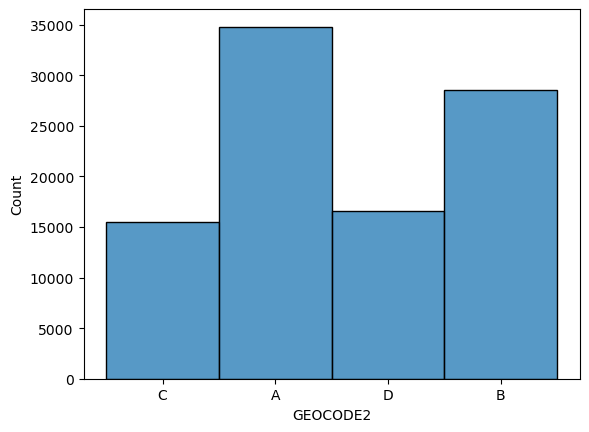

In [35]:
sns.histplot(categorical['GEOCODE2'])
plt.show()

In [32]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

**2. WEALTH1**

In [36]:
numerical['WEALTH1'].isna().sum()
# Change into object
# 1. Create a new column with "unknown"

44732

In [37]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


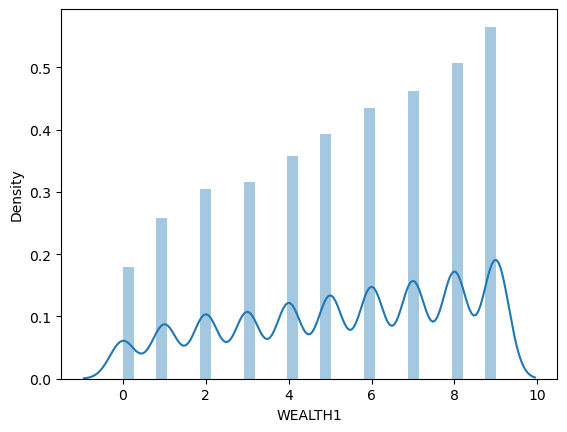

In [38]:
sns.distplot(numerical['WEALTH1'])
plt.show()

In [39]:
numerical['WEALTH1'].mean()

5.345698500394633

In [40]:
# Fill with the median
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(5.0)

**3. ADI**

In [41]:
numerical['ADI'].isna().sum()

132

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


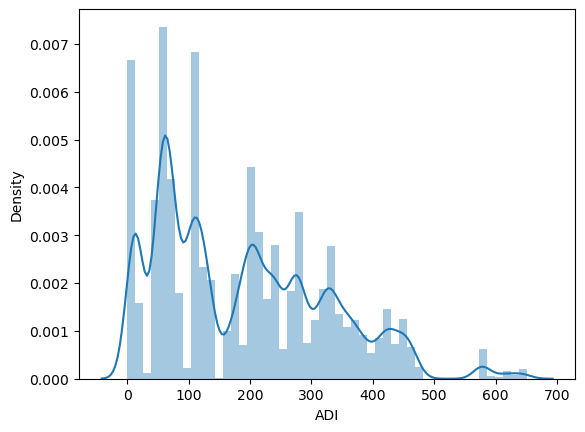

In [42]:
sns.distplot(numerical['ADI'])
plt.show()

In [44]:
mean_adi = numerical['ADI'].mean()

In [ ]:
# OPTION 1 -- Delete the rows
numerical = numerical.dropna(subset=['ADI'])

In [45]:
# OPTION 2 -- Assign mean to the rows
numerical['ADI'] = numerical['ADI'].fillna(mean_adi)

**4. DMA**

In [46]:
numerical['DMA'].isna().sum()

132

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


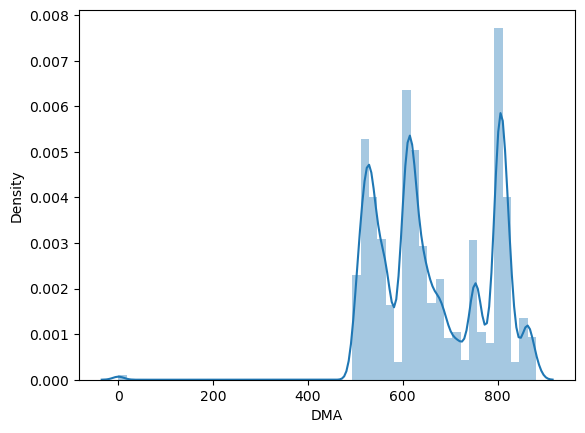

In [47]:
sns.distplot(numerical['DMA'])
plt.show()

In [48]:
mean_dma = numerical['DMA'].mean()
mean_dma

664.0040722082284

In [ ]:
# OPTION 1 - Delete the rows
numerical = numerical.dropna(subset=['DMA'])

In [49]:
# OPTION 2 -- Assign mean to the rows
numerical['DMA'] = numerical['DMA'].fillna(mean_dma)

**5. MSA**

In [50]:
numerical['MSA'].isna().sum()

132

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


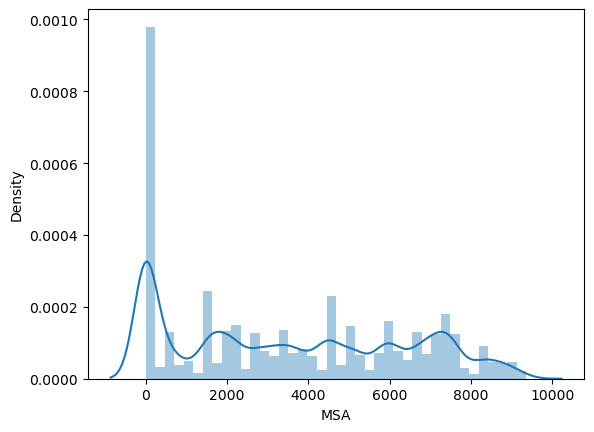

In [51]:
sns.distplot(numerical['MSA'])
plt.show()

In [53]:
mean_msa = numerical['MSA'].mean()
mean_msa

3527.744101595298

In [ ]:
# OPTION 1 - Delete the rows
numerical = numerical.dropna(subset=['MSA'])

In [54]:
# OPTION 2 -- Assign mean to the rows
numerical['MSA'] = numerical['MSA'].fillna(mean_msa)

In [55]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
8,MBCRAFT,52854
9,MBGARDEN,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973
